In [1]:
import os
import sys
import numpy as np
np.set_printoptions(suppress=True, linewidth=200)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})
plt.rcParams['axes.formatter.useoffset'] = True
sys.path.append('./src')
from utils_pde_shock_elasticity import computeElas
from scipy.optimize import bisect

In [2]:
def return_solution(gamma, twoparameter, action_name = "onecap_model_with_structure_ambiguity"):

    Delta = 1.0
    rho = 1.0 
    alpha = 0.0922
    q = 0.2
    
    outputdir = f"./output/{action_name}/Delta_{Delta}_twoparameter_{twoparameter}/q_{q}_gamma_{gamma}_rho_{rho}_alpha_{alpha}/"
    res = np.load(outputdir + "res.npz")

    uncertainty_priceelas = np.load(outputdir + "uncertainty_priceelas.npz",allow_pickle=True)

    g_Z = res['g']

    mu_z = res['mu_z']
    mu_z_s = res['mu_z_distorted']
    hk = res['hk']
    hz = res['hz']
    Hk = (1-gamma)*hk
    Hz = (1-gamma)*hz
    sk = res['s1']
    sz = res['s2']
    mu_z_u = (1-gamma) * (hk*res['sigma_z'][0] + hz*res['sigma_z'][1])
    mu_z_d = mu_z + mu_z_s + mu_z_u
    Uk = sk + Hk
    Uz = sz + Hz

    results = {'res': res, 'g_Z': g_Z, 'mu_z': mu_z, 'mu_z_s': mu_z_s, 'hk': hk, 'hz': hz, 'Hk': Hk, 'Hz': Hz, 'sk': sk, 'sz': sz, 'mu_z_u': mu_z_u, 'mu_z_d': mu_z_d, 'Uk': Uk, 'Uz': Uz, 'uncertainty_priceelas': uncertainty_priceelas}

    return results

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(color=color, headwidth=10),
        size=size
    )

In [3]:
#Load results
gamma_1_q_20_rho_1_parameters_2 = return_solution(gamma = 1.0, twoparameter= 0)
gamma_4_q_20_rho_1_parameters_2 = return_solution(gamma = 4.0, twoparameter= 0)

gamma_1_q_20_rho_1_parameters_4 = return_solution(gamma = 1.0, twoparameter= 1)
gamma_3_q_20_rho_1_parameters_4 = return_solution(gamma = 3.0, twoparameter= 1)

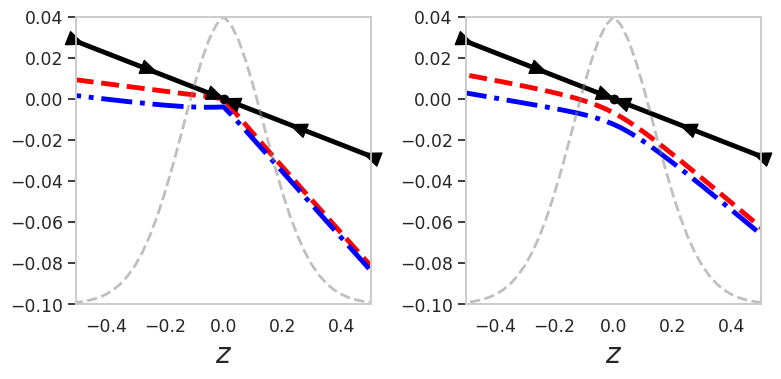

In [9]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

res = gamma_1_q_20_rho_1_parameters_4['res']
original_z_plot = sns.lineplot(x = res['zz'], y = res['mu_z'], color = 'black', ax = ax[0])

arrows = res['mu_z'][::10]
for arrow_x in res['zz'][::10][16:20]:
    add_arrow(original_z_plot.lines[0], position=arrow_x,color='black', size=40)
for arrow_x in res['zz'][::10][21:25]:
    add_arrow(original_z_plot.lines[0], position=arrow_x,color='black', size=40, direction='left')
add_arrow(original_z_plot.lines[0], position=res['zz'][::10][20]+0.03,color='black', size=40, direction='left')
add_arrow(original_z_plot.lines[0], position=res['zz'][::10][20]-0.03,color='black', size=40, direction='right')
ax[0].scatter(0,0,color='black')

sns.lineplot(x = res['zz'], y = gamma_1_q_20_rho_1_parameters_4['mu_z_d'], ls='--',color='red',ax=ax[0])
sns.lineplot(x = res['zz'], y = gamma_3_q_20_rho_1_parameters_4['mu_z_d'], ls='-.',color='blue',ax=ax[0])
ax[0].set_ylim([-0.1, 0.04])
ax[0].set_xlim([-0.5, 0.5])
ax[0].grid(False)
ax[0].set_xlabel(r'$z$', fontsize=20)

ax02 = ax[0].twinx()
sns.lineplot(x = res['zz'],y=gamma_1_q_20_rho_1_parameters_4['g_Z'], ax=ax02, ls='--', color='grey',lw=2.0, alpha=0.5)
ax02.set_ylim([0,2.75])
ax02.grid(False)
ax02.set_yticks([])
ax02.set_yticklabels([])

res = gamma_1_q_20_rho_1_parameters_4['res']
original_z_plot = sns.lineplot(x = res['zz'], y = res['mu_z'], color = 'black', ax = ax[1])

arrows = res['mu_z'][::10]
for arrow_x in res['zz'][::10][16:20]:
    add_arrow(original_z_plot.lines[0], position=arrow_x,color='black', size=40)
for arrow_x in res['zz'][::10][21:25]:
    add_arrow(original_z_plot.lines[0], position=arrow_x,color='black', size=40, direction='left')
add_arrow(original_z_plot.lines[0], position=res['zz'][::10][20]+0.03,color='black', size=40, direction='left')
add_arrow(original_z_plot.lines[0], position=res['zz'][::10][20]-0.03,color='black', size=40, direction='right')
ax[1].scatter(0,0,color='black')

sns.lineplot(x = res['zz'], y = gamma_1_q_20_rho_1_parameters_2['mu_z_d'], ls='--', color='red',  ax=ax[1])
sns.lineplot(x = res['zz'], y = gamma_4_q_20_rho_1_parameters_2['mu_z_d'], ls='-.', color='blue', ax=ax[1])
ax[1].set_ylim([-0.1, 0.04])
ax[1].set_xlim([-0.5, 0.5])
ax[1].grid(False)
ax[1].set_xlabel(r'$z$', fontsize=20)

ax12 = ax[1].twinx()
sns.lineplot(x = res['zz'],y=gamma_1_q_20_rho_1_parameters_2['g_Z'], ax=ax12, ls='--', color='grey',lw=2.0, alpha=0.5)
ax12.set_ylim([0,2.75])
ax12.grid(False)
ax12.set_yticks([])
ax12.set_yticklabels([])

plt.tight_layout()
plt.show()

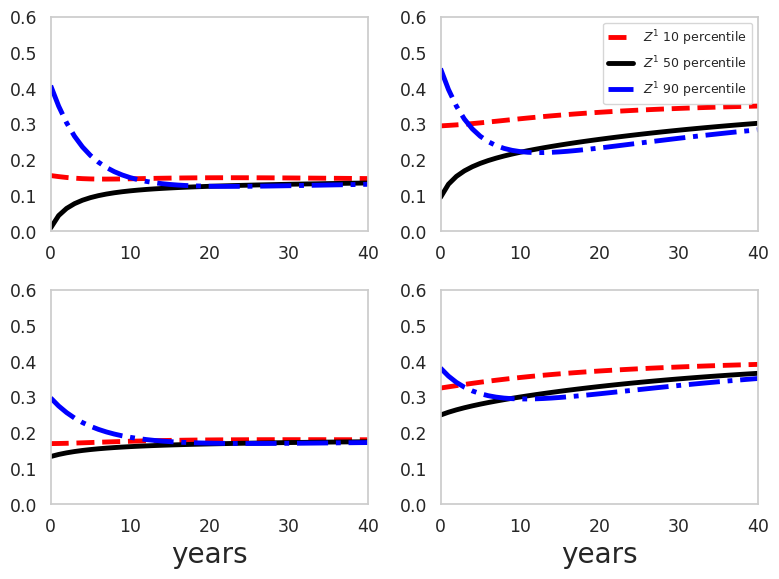

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

plotdir = "./plots/"
data = gamma_1_q_20_rho_1_parameters_4
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[0, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[0, 0], ls='--', color='red')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[1, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[0, 0], ls='solid', color='black')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[2, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[0, 0], ls='dashdot', color='blue')

data = gamma_3_q_20_rho_1_parameters_4
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[0, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[0, 1], ls='--', color='red')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[1, 1, :], label=r"$Z^1$ 50 percentile", ax=ax[0, 1], ls='solid', color='black')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[2, 1, :], label=r"$Z^1$ 90 percentile", ax=ax[0, 1], ls='dashdot', color='blue')

data = gamma_1_q_20_rho_1_parameters_2
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[0, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[1, 0], ls='--', color='red')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[1, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[1, 0], ls='solid', color='black')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[2, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[1, 0], ls='dashdot', color='blue')

data = gamma_4_q_20_rho_1_parameters_2
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[0, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[1, 1], ls='--', color='red')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[1, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[1, 1], ls='solid', color='black')
sns.lineplot(data=data['uncertainty_priceelas']['price_elasticity'].item().secondType[2, 1, :], label=r"$Z^1$ 10 percentile", ax=ax[1, 1], ls='dashdot', color='blue')

for axes in ax:
    for axis in axes:
        axis.set_ylim(0, 0.6)
        axis.set_xlim(0, 40)
        axis.set_xlabel('years', fontsize=20)
        axis.grid(False)
        axis.legend().remove()

ax[0,1].legend(fontsize=9)
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')

fig.tight_layout()
plt.show()


In [6]:
sigma_k1 = res['sigma_k'][0]
sigma_k2 = res['sigma_k'][1]
sigma_z1 = res['sigma_z'][0]
sigma_z2 = res['sigma_z'][1]
hat_beta_z = res['a11']
phi = res['phi']
delta = res['delta']
rho = res['rho']
alpha = res['alpha']
hat_alpha_z = 0
hat_alpha_k = res['eta']
hat_beta_k = res['beta']

In [7]:
def extract_eta1s(eta1_contour):
    eta1s = []
    for collection in eta1_contour.collections:
        for path in collection.get_paths():
            points = path.vertices
            eta1s.extend(points)
    return eta1s

def get_alphaz(eta_01, eta_02, eta_11,eta_12):
    alpha_z = (sigma_z1*eta_01+sigma_z2*eta_02 + hat_alpha_z)
    return alpha_z

def get_alphak(eta_01, eta_02, eta_11,eta_12):
    alpha_k = -(sigma_k1*eta_01 + sigma_k2*eta_02 - hat_alpha_k)
    return alpha_k

def get_betaz(eta_01, eta_02, eta_11,eta_12):
    beta_z = hat_beta_z - sigma_z1*eta_11 - sigma_z2*eta_12
    return beta_z

def get_betak(eta_01, eta_02, eta_11,eta_12):
    beta_k = hat_beta_k + sigma_k1*eta_11 + sigma_k2*eta_12
    return beta_k

def find_eta_1_root(q, twoparameter):
    if twoparameter==0:
        rho2 = q**2/((sigma_z1**2 + sigma_z2**2))
        print(f"rho_2 for slope parameters only = {rho2}")
    elif twoparameter==1:
        rho2 = q**2/((sigma_z1**2 + sigma_z2**2)*2) 
        print(f"rho_2 for all four parameters = {rho2}")
        
    def quadratic(eta_11, eta_12, rho2):
         return -hat_beta_z * rho2 + rho2 *(sigma_z1*eta_11 + sigma_z2*eta_12) + (eta_11**2+eta_12**2)/2
    
    def get_contour(quadratic, rho2):
        quadratic_vector = np.vectorize(quadratic)
        X = np.linspace(-5.0, 5.0, 5000)
        Y = np.linspace(-5.0, 5.0, 5000)
        X, Y = np.meshgrid(X, Y)
        W = np.ones((5000,))*rho2
        Z = quadratic_vector(X,Y,W)
        eta1_contour = plt.contour(X, Y, Z, levels=[0],colors='black')
        plt.close()
        return eta1_contour
    
    eta1_contour = get_contour(quadratic, rho2)
    eta1s = extract_eta1s(eta1_contour)
    
    eta_01s = []
    eta_02s = []
    eta_11s = []
    eta_12s = []
    
    def eta02_root(eta_02, rho2):
        eta_01 = -(rho2*sigma_z2*eta_02+eta_12*eta_02)/(rho2*sigma_z1+eta_11)
        return (eta_01**2+eta_02**2)/2 + (sigma_z1**2+sigma_z2**2)/2*rho2 - q**2/2 
    

    def eta01_root(eta_02, rho2):
        return -(rho2*sigma_z2*eta_02+eta_12*eta_02)/(rho2*sigma_z1+eta_11)
    
    
    for eta1 in eta1s:
        eta_11 = eta1[0]
        eta_12 = eta1[1]
        eta_02 = bisect(eta02_root, 0, 2,args=(rho2,))
        eta_01 = eta01_root(eta_02, rho2)
        eta_01s.append(eta_01)
        eta_02s.append(eta_02)
        eta_11s.append(eta_11)
        eta_12s.append(eta_12)

    for eta1 in eta1s:
        eta_11 = eta1[0]
        eta_12 = eta1[1]
        eta_02 = bisect(eta02_root, -2, 0,args=(rho2,))
        eta_01 = eta01_root(eta_02, rho2)
        eta_01s.append(eta_01)
        eta_02s.append(eta_02)
        eta_11s.append(eta_11)
        eta_12s.append(eta_12)
        
    min_eta11 = min(eta_11s)
    min_eta12 = min(eta_12s)
    max_eta11 = max(eta_11s)
    max_eta12 = max(eta_12s)
    
    alpha_zs = []
    alpha_ks = []
    beta_zs = []
    beta_ks = []


    for eta_01, eta_02, eta_11,eta_12 in zip(eta_01s, eta_02s, eta_11s, eta_12s):
        alpha_zs.append(get_alphaz(eta_01, eta_02, eta_11,eta_12))
        alpha_ks.append(get_alphak(eta_01, eta_02, eta_11,eta_12))
        beta_zs.append(get_betaz(eta_01, eta_02, eta_11,eta_12))
        beta_ks.append(get_betak(eta_01, eta_02, eta_11,eta_12))
        
    
    return eta1_contour, alpha_zs, alpha_ks, beta_zs, beta_ks


solution_q_002_2 = find_eta_1_root(0.2,0)
solution_q_002_4 = find_eta_1_root(0.2,1)

rho_2 for slope parameters only = 16.28502705757246
rho_2 for all four parameters = 8.14251352878623


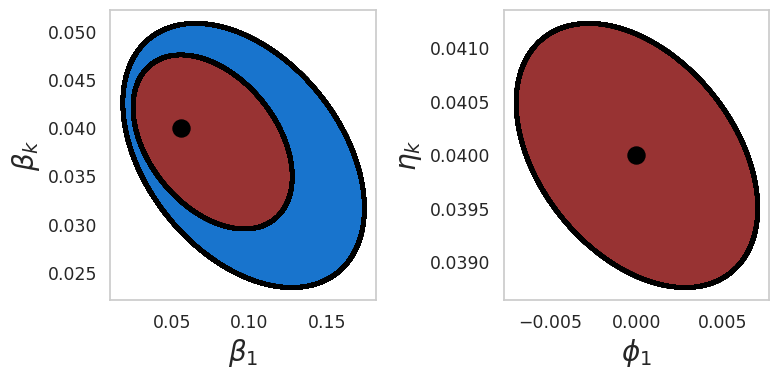

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4))

# First subplot
contour, alpha_zs, alpha_ks, beta_zs, beta_ks = solution_q_002_2
plt.subplot(1, 2, 1)
plt.fill(beta_zs, beta_ks, color='#1874CD', linewidth=2)
plt.ylabel('$\\beta_k$', fontsize='20')
plt.xlabel('$\\beta_1$', fontsize='20')
plt.scatter(beta_zs, beta_ks, color='black', s=4)
plt.scatter(hat_beta_z, hat_beta_k, color='black', s=150)
plt.grid(False)

# Second subplot
plt.subplot(1, 2, 1)
contour, alpha_zs, alpha_ks, beta_zs, beta_ks = solution_q_002_4
plt.fill(beta_zs, beta_ks, color='#983333', linewidth=2)
plt.ylabel('$\\beta_k$', fontsize='20')
plt.xlabel('$\\beta_1$', fontsize='20')
plt.scatter(beta_zs, beta_ks, color='black', s=4)
plt.scatter(hat_beta_z, hat_beta_k, color='black', s=150)
plt.grid(False)

plt.subplot(1, 2, 2)
plt.fill(alpha_zs, alpha_ks, color='#983333', linewidth=2)
plt.ylabel('$\\eta_k$', fontsize='20')
plt.xlabel('$\\phi_1$', fontsize='20')
plt.scatter(alpha_zs, alpha_ks, color='black', s=4)
plt.scatter(hat_alpha_z, hat_alpha_k, color='black', s=150)
plt.grid(False)

xmin = -0.02
xmax = 0.2
ymin = 0.02
ymax = 0.055
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(ymin,ymax)
ax[2].set_xlim(xmin,xmax)
ax[2].set_ylim(ymin,ymax)

plt.tight_layout() 
plt.show()